# SICSS Norrköping 2025: Network Analysis (SOLUTIONS)

Author: Alexandra Rottenkolber

Topics covered: Introduction to NetworkX, network descriptives, first little network analysis

Date: 15th June 2025

## Introduction & getting started

Welcome to the practical part of the network analysis day! 
In this session, you will get an introduction to how to represent a network with the help of Python (or R, see other script), how to calculate basic network descriptives (on the micro, meso and macro level), and how to put on the "network thinking hat". You are invited to work through the exercise sheet on your own with help of mine and Carl where needed. If you are already familiar with some aspects of the lab, feel free to jump over certain sections.


**Learning goals for this workshop**

1. Introduction
- Get to know the basic functionality of _NetworkX_
- Create a graph from scratch (add nodes, edges, attributes) 
- Visualise it

2. Basic network descriptives
- macro-level descriptives
- meso-level descriptives
- micro-level descriptives

3. Network thinking
- Majority illusion
- Friendship paradox

### Introduction 

**Getting started.** First, we need to install the most important packages for network analysis with Python. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Install packages we will need all the time

# Install networkx
try:
    import networkx as nx
except ModuleNotFoundError:
    ! conda install --yes -c anaconda networkx

# Install pandas
try:
    import pandas as pd
except ModuleNotFoundError:
    ! conda install --yes -c anaconda pandas
    
# Install numpy
try:
    import numpy as np
except ModuleNotFoundError:
    ! conda install --yes -c anaconda numpy

try:
    import scipy
except ModuleNotFoundError:
    ! conda install --yes -c anaconda scipy

# Install matplotlib
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    ! conda install --yes -c conda-forge matplotlib
    
# collections
try:
    from collections import Counter
except ModuleNotFoundError:
    ! conda install --yes -c anaconda collections
    
# seaborn
try:
    import seaborn as sns
except ModuleNotFoundError:
    ! conda install --yes -c anaconda seaborn

### Creating a network graph in Python

The most widely used Python package for network analysis is called _NetworkX_. 
Networks exist in _NetworkX_ as graph objects and can be assigned to variables. 
To create an empty graph, one can simply type:

In [3]:
g = nx.Graph() # assign empty graph to variable 
print(g)

Graph with 0 nodes and 0 edges


#### Adding nodes
After creating an empty graph, we can start adding nodes, edges, and attributes for both nodes and edges. 

In [4]:
# Add nodes
g.add_node(1) # add a single node
g.add_nodes_from([2,3,4,5]) # add nodes from a list

# check the current state
print(g)
print(g.nodes)

Graph with 5 nodes and 0 edges
[1, 2, 3, 4, 5]


Some things to keep in mind:

- Node IDs can be integers or strings but should be consistent.
- All nodes need to have unique names.
- One can think about the _NetworkX_ graph element as having a structure similar to dictionaries (i.e. beeing nested).


#### Adding edges

In [5]:
# Add edges manually 
g.add_edge(2,6) # add edge (2,6) between node 2 and node 6
g.add_edge(7,8) # add edge (7,8) between node 7 and node 8
g.add_edge(7,9) # add edge (7,9) between node 7 and node 9
g.add_edge(8,9) # add edge (8,9) between node 8 and node 9

print(g)
print(g.nodes)

Graph with 9 nodes and 4 edges
[1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Draw graph

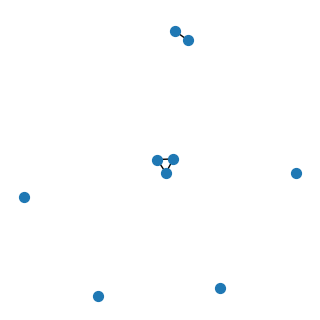

In [6]:
plt.figure(figsize=(3,3))
nx.draw(g, node_size = 50)

#### Undirected vs Directed graphs

In [7]:
# Add directed edges from edge list 
# Difference between directed and undirected graphs
dir_edges = [("Ali","Christine"),
             ("Babette","Christine"), 
             ("Christine","Babette")]

g2 = nx.Graph(dir_edges) # this results in an undirected graph
dg1 = nx.DiGraph(dir_edges) # this results in a directed graph

print(g2) # note the number of edges
print(g2.nodes)

print(dg1) # note the number of edges in comparison to g2
print(dg1.nodes)

Graph with 3 nodes and 2 edges
['Ali', 'Christine', 'Babette']
DiGraph with 3 nodes and 3 edges
['Ali', 'Christine', 'Babette']


#### Adding attributes

The expression `g[<label>]`, where `g` represents a graph object, will query for nodes. For attributes, we need to use `g.graph[<attribute>]`. For nodes, `g.nodes[<node_label>][<attribute>]`, and for edges `g.edges[<node1_label>,<node2_label>][<attribute>]`.

In [8]:
# For graph 
g.graph["name"] = "example"
g.graph["type"] = "test"

print(g)

# Add node attributes
dg1.nodes["Ali"]["hometown"] = "Berlin"
dg1.nodes["Ali"]["no_close_friends"] = 3
print(dg1.nodes["Ali"])

# Add edge attributes
dg1.edges["Ali","Christine"]["type"] = "friend"
print(dg1.edges["Ali","Christine"])

Graph named 'example' with 9 nodes and 4 edges
{'hometown': 'Berlin', 'no_close_friends': 3}
{'type': 'friend'}


#### Exercise 1: Let's visualise a network

_NetworkX_ has a [drawing module](https://networkx.org/documentation/stable//reference/drawing.html) readily available, which provides various options for generating visualisations with different layouts. 

For the next few sections, we will use Zachary’s Karate Club graph as an example network. Zachary’s Karate Club is a very famous network from the social network analysis discipline ([this](https://www.pnas.org/doi/full/10.1073/pnas.122653799) is the paper that made it famous, [this](https://www.jstor.org/stable/pdf/3629752.pdf?casa_token=g09eGs0jjiEAAAAA:iepvaiTY5ccVRvpskS0VOJsa2EoqeX2l0QEffeZ30ocwIjOUP5pn62LDKnG19MweegE3Z3lBse2vw60w9iUnRu7369NGRdWEwdoa1XPwbIH-b7igarw) is the paper (written by W. Zachary) where it stems from). 

In his study, Zachary observed the friendship ties of members of a university's karate club over the duration of two years. During this time period, a disagreement occurred between the administrator of the club and the club's instructor, which led to the instructor leaving the club. He eventually founded a new club taking half of the original club's members with him. Based on the structure of the friendship network, Zachary was able to predict almost exactly which of the two clubs people would join after the split.

This network is so famous that it is in-built in _NetworkX_. You can simply call it by invoking `G = nx.karate_club_graph()`. Try some of the drawing options if you want, for example `nx.draw(G)`, `nx.draw_networkx(G)`, `nx.draw_circular(G)`, `nx.draw_kamada_kawai(G)`, `nx.draw_random(G)`, `and nx.draw_spring(G)`. You could also try out some styling options (change colour/size/transparency of nodes/edges etc.) for one layout of your choice.

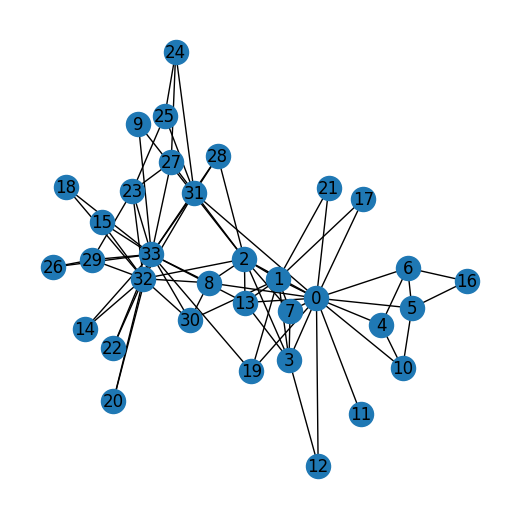

In [9]:
plt.rcParams['figure.figsize'] = [5, 5]
G_karate = nx.karate_club_graph() # calling the Karate Club Graph
nx.draw(G_karate, with_labels = True)

In [9]:
# investigate node attributes
#for node in G_karate.nodes(): 
#    print(G_karate.nodes[node])

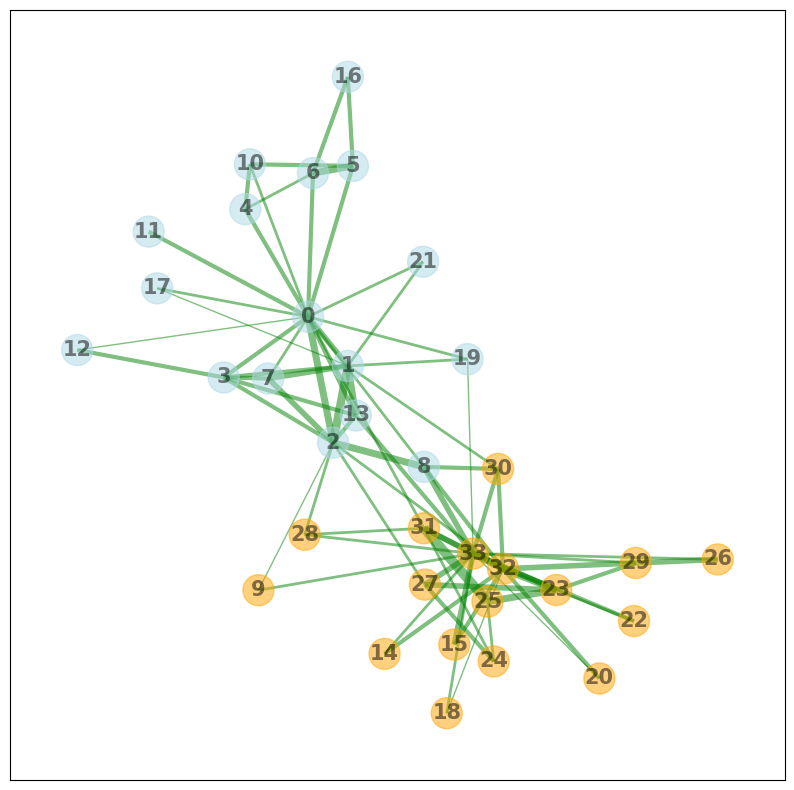

In [10]:
# style a graph
plt.figure(figsize=(10, 10)) # networkx uses matplotlib as basis for plotting, so you can use this here
weights = [G_karate[u][v]['weight'] for u,v in G_karate.edges] # extract the edge weights for plotting the graph
group_membership = [G_karate.nodes[node]['club'] for node in G_karate.nodes()] # extract group membership for plotting
node_color = ["lightblue" if entry == "Mr. Hi" else "orange" for entry in group_membership] # assign color based on group membership

# generate plot 
nx.draw_networkx(G_karate, 
                 pos=nx.spring_layout(G_karate), # determine layout
                 arrows = False, # diplayed as directed or undirected graph
                 node_size = 500, 
                 node_color = node_color,
                 node_shape = "o", 
                 alpha = 0.5, # transparency
                 edge_color = "green", 
                 width = weights, 
                 with_labels=True, # adds node labels. 
                 font_size = 15, 
                 font_weight = "bold") 

## Basic network descriptives

### Macro level (global level): 
Summary statistics, such as
- size, and average degree, degree distribution
- average clustering
- transitivity 

For simplicity, let's continue with Zachary's karate club. 

#### Size and degrees

In [11]:
print(G_karate) # get info about graph
G_karate.number_of_edges(), len(G_karate.edges()), G_karate.number_of_nodes(), len(G_karate.nodes()) # alternative

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


(78, 78, 34, 34)

In [12]:
G_karate.degree() # Returns an object containing the degree of each node 

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [13]:
# calculate average degree by iterating through the DegreeView object
print("The average degree is:", 
      round(sum([d for n,d in G_karate.degree()])/len(G_karate), 2))

The average degree is: 4.59


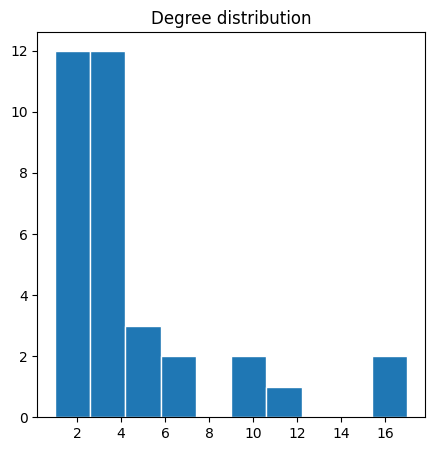

In [14]:
# degree distribution
def plot_degree_dist(G, bins = None):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, ec="white", bins = bins)
    plt.title("Degree distribution")
    plt.show()        

plot_degree_dist(G_karate, bins = 10)

#### Transitivity and average clustering coefficient 

Often also useful descriptives at the macro level are the transitivity coefficient and the average clustering coefficient (clustering coefficients also exist at the local (node-) level). Transitivity describes how many of the existing triads are actually closed. The average clustering coefficient describes -- as the name already indicates -- the average of all nodes' clustering coefficient. The node-level clustering coefficient describes the fraction of possible triangles through a node that actually exists.

In [16]:
# number of triangles a node is part of
triangles = nx.triangles(G_karate)
print(f"Number of triangles a node is part of: \t{triangles}\n") 

# Transitivity 
# Captures triangles; how many of existing triads (e.g. relationships) are actually closed (i.e. triangles)
transitivity = nx.transitivity(G_karate)
print(f"Transitivity: \t\t\t\t {round(transitivity, 2)}\n") 

# Clustering (node level) 
node_lev_clust = nx.clustering(G_karate)
print(f"Node level clustering: \t\t\t {[(key, round(value, 2)) for key, value in node_lev_clust.items()][:5]}, ...\n")

# Average clustering 
avg_clust = nx.average_clustering(G_karate)
print(f"Average clustering: \t\t\t {round(avg_clust, 2)}") 
#sum(node_lev_clust.values())/len(G_karate.nodes()) # this is the same as nx.average_clustering(Gu)

Number of triangles a node is part of: 	{0: 18, 1: 12, 2: 11, 3: 10, 4: 2, 5: 3, 6: 3, 7: 6, 8: 5, 9: 0, 10: 2, 11: 0, 12: 1, 13: 6, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 4, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 4, 30: 3, 31: 3, 32: 13, 33: 15}

Transitivity: 				 0.26

Node level clustering: 			 [(0, 0.15), (1, 0.33), (2, 0.24), (3, 0.67), (4, 0.67)], ...

Average clustering: 			 0.57


### Meso level (everything 'in between'): 
A group of nodes' characteristics live at the mesoscale, such as
- community detection 
- homophily
- assortativity

#### Community detection 

Community detection is a very large field of research and has received a lot of attention in the past. The wish behind community detection basically is to identify a network's mesoscale organisation. In simplistic terms, a community is a group of nodes which are somewhat more related to each other than to others in the network. Community detection for networks is conceptually similar to data clustering in machine learning. It is helpful if one wants to find nodes that would, for example, react similarly to an external stimulus or if you want to visualise the meso-level organisation of a network. 

There are many different algorithms out there to find communities: Some use a group's internal density, the similarity to neighbours, or the idea of random walks, ... As some of the approaches out there differ in their internal logic, they might yield slightly different results. 

_NetworkX_ has some community detection algorithms built-in, which you can find [here](https://networkx.org/documentation/stable/reference/algorithms/community.html), and which we will use in the following. If you get interested, there is another Python library called [`cdlib`](https://cdlib.readthedocs.io/en/latest/reference/algorithms.html), which has even more algorithms implemented.

In [17]:
coms_kc = [item for item in nx.community.k_clique_communities(G_karate, 2)] # K-Clique 
coms_louvain = nx.community.louvain_communities(G_karate) # Louvain
coms_greedy = nx.community.greedy_modularity_communities(G_karate) # Greedy
coms_label = list(nx.community.label_propagation_communities(G_karate)) # Label propagation
coms_ks = list(nx.community.kernighan_lin_bisection(G_karate)) # bisection

In [18]:
different_versions = [coms_kc, coms_louvain, coms_greedy, coms_label, coms_ks]
for name, version in zip(["K-clique", "Louvain", "Greedy", "Label Propagation", "Kernighan–Lin bipartition"], different_versions): 
    print(name, ":", len(version))

K-clique : 1
Louvain : 4
Greedy : 3
Label Propagation : 3
Kernighan–Lin bipartition : 2


In [19]:
def draw_partition(G, partition, pos=False, edges = False, ax=None, label=None):
    '''
    Draws a network with different colors for each commmunity in a mutually exclusive partition.
    (Function amended based on Lab written by Bernie Hogan.)
    '''
        
    # Get color per partition
    if not pos: 
        pos = nx.kamada_kawai_layout(G)
    
    palette = sns.husl_palette(len(partition))
    p_array = [np.array([x]) for x in palette]
    
    # Iterate through all partitons, create subgraph and plot in certain colour
    for c in range(len(partition)):
        nx.draw_networkx_nodes(G.subgraph(partition[c]),
                               pos,
                               node_size=15,
                               alpha=.7,
                               node_color=p_array[c],
                               ax=ax)

    if edges:
        nx.draw_networkx_edges(G, pos, edge_color="lightgrey",ax=ax)
        
    if label:
        ax.set_xlabel(label)

In [20]:
pos = nx.kamada_kawai_layout(G_karate)

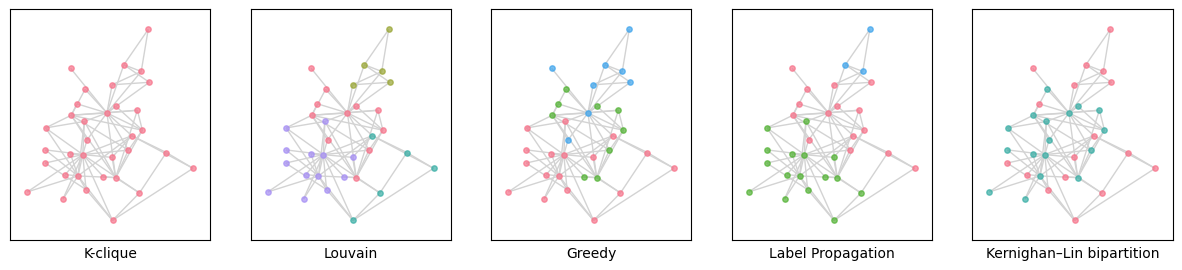

In [21]:
plt.rcParams['figure.figsize'] = [15, 3]

fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1,5)

for ax, version, name in zip((ax1, ax2, ax3, ax4, ax5), different_versions, ["K-clique", "Louvain", "Greedy", "Label Propagation", "Kernighan–Lin bipartition"]):
    draw_partition(G_karate, version, pos, edges = True, ax=ax, label=name)

plt.show() 

**What did you observe?**

Probably you found that the results are quite different. Was there even a single pair of algorithms that returned exactly the same partitions?

There are different ways to continue from this finding: One option is to evaluate the partitioning based on some quality measure (e.g. the "modularity score", or the "Normalised Mutual Information"). Another option would be to apply "[consensus clustering](https://www.nature.com/articles/srep00336)" -- an approach inspired by an observation from machine learning which can be summarised as 'averaging several simple models often yields better accuracy than constructing the most sophisticated model possible'. 
The idea is very simple: Run several clustering algorithms (also the same one many times) and average the results. However, this method should not be applied blindly: Make sure the results you are averaging stem from an internally consistent ensemble of clustering algorithms (i.e. the same "family", meaning: all algorithms apply the same logic. For example, don't mix flow-based (infomap and co) with density optimisation algorithms, etc.).

#### Quantifying homophily: Assortativity coefficient


At the meso level, we could also be interested in quantifying the extent to which homophily is driving a network's connections. This is where the assortativity coefficient can help us. The idea behind this measure is a comparison of the number of ties that occur in-group vs such that bridge to another group compared to the total number of ties. The assortativity coefficient, however, is a bit more advanced than this simple illustration: It is able to take different group sizes/more than two groups into account. For the assortativity coefficient, 1 means perfect assortativity (assortativity: more in-group than between group ties), -1 means perfect disassortativity (disassortativity: more between group than in-group ties).

In [22]:
# assortativity 
coef = nx.attribute_assortativity_coefficient(G_karate, "club")
print(f"The attribute assortativity coefficient for 'club': {round(coef, 2)}.")

The attribute assortativity coefficient for 'club': 0.72.


Here we find the Karate network to be assorted by 'support' meaning that there is not to much mixing among support groups.

### Micro level (local level): 
Node-level characteristics such as
- centrality measures (degree centrality, betweenness centrality, closeness centrality, PageRank)

On the micro-level, we are usually interested in the question: Which are the important nodes? In which way are they important?

To answer this question, we could start looking at the degree of a node, assuming that the ones with the most links are most likely the most important ones. But what if we want to measure another "type of importance", e.g. if a node has a bridging functionality (critical for example for information flow, exchange, exposure, etc.)? Such a node probably has a very small degree, but if it were gone the topology of the network would be substantially different.

To capture these different qualities, we have different measures at hand (usually summarised as centrality measures). The most important ones are closeness centrality, betweenness centrality, and PageRank, and the local clustering coefficients. _NetworkX_ has the most important algorithms readily implemented, accessible via for example `nx.betweenness_centrality(g)` for betweenness centrality.

In [23]:
plt.rcParams['figure.figsize'] = [7, 5]
def plot_network_by_metric(g, metric):
    if metric == "betweenness": 
        node_colors = [float(value) for value in nx.betweenness_centrality(g).values()] # access betwenness centrality at the node level
    
    elif metric == "closeness":   
        node_colors = [float(value) for value in nx.closeness_centrality(g).values()] # access closeness centrality at the node level

    elif metric == "pagerank":
        node_colors = [float(value) for value in nx.pagerank(g).values()] # access PageRank centrality at the node level
    
    elif metric == "local_clustering": 
        node_colors = [float(value) for value in nx.clustering(g).values()] # access the clustering coefficient at the node level
        
    elif metric == "degree": # access the degree of a node
        node_colors = [value for key, value in g.degree()] 
        
    else: 
        print("Choose metric!")
    

    labels = {}
    for node in g.nodes(): 
        labels[node] = node

    pos_=nx.kamada_kawai_layout(g)

    fig = nx.draw_networkx_nodes(g, 
                                 pos_, 
                                 node_size = 400,
                                 node_color = node_colors,
                                 alpha = 0.5)
    nx.draw_networkx_edges(g, 
                           pos_, 
                           alpha = 0.2)
    nx.draw_networkx_labels(g, 
                            labels=labels, 
                            pos = pos_,
                            font_size=12)

    plt.colorbar(fig)
    plt.title(f"Node color indicates {metric}")
    plt.show()

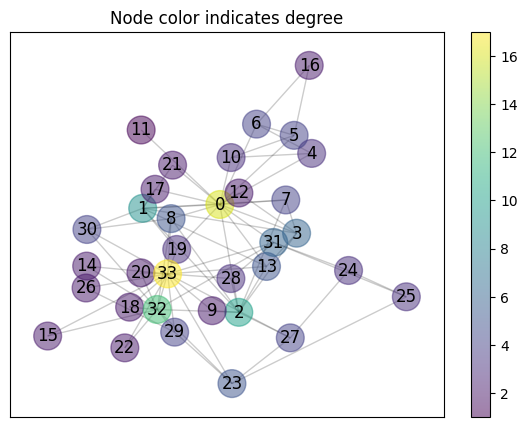

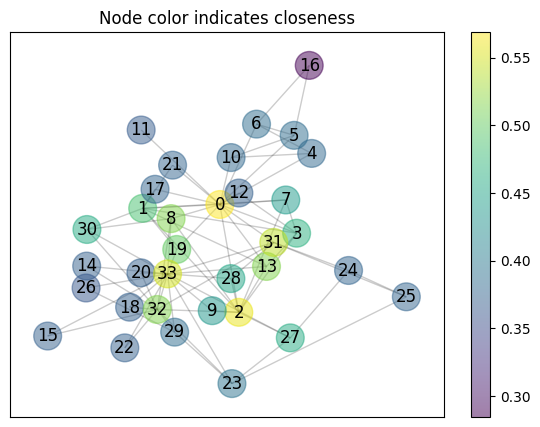

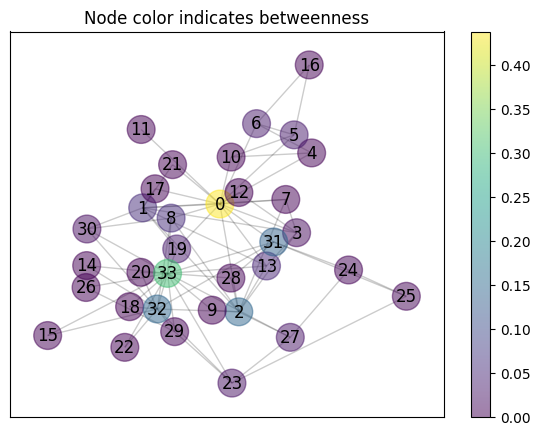

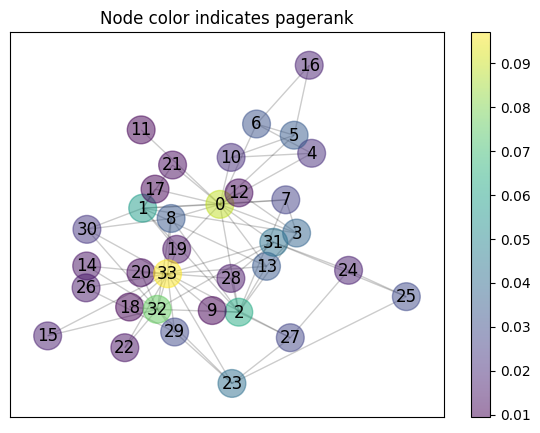

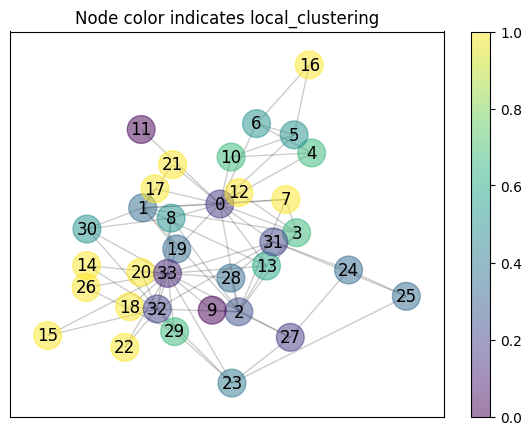

In [24]:
for metric in ["degree", "closeness", "betweenness", "pagerank", "local_clustering"]:
    plot_network_by_metric(G_karate, metric)

## Network thinking 

This section aims at simulating your network thinking. You will discover two network peculiarities that might appear counterintuitive at the first glance, but make a lot of sense once you take the networks' topologies into consideration.

### Majority illusion

In networks where we observe strong homophily, it might happen that we observe something like the "illusion of a majority": Even if the majority does not hold a certain characteristic, we can draw a network in which most people belief the opposite is true. 

Let's look at an easy example. Below you are given an artificial friendship network. Nodes represent friends which are assinged one attribute (their gender). 

In [25]:
# An artificial undirected friendship network 
edges_dir = [("Kira","Amaya"), 
            ("Rohan","Amaya"), 
            ("Amaya", "Robin"),
            ("Robin","Hanna"),
            ("Hanna","Adam"),
            ("Amaya","Kira"), 
            ("Igor","Hanna"), 
            ("Amaya","Hanna"), 
            ("Adam","Igor")]

# gender // qualitative attribute
gender = {"Kira": "f", 
        "Amaya":"f", 
        "Rohan":"m", 
        "Robin":"d", 
        "Hanna":"f", 
        "Adam":"m", 
        "Igor":"m"}

G_friends = nx.Graph(edges_dir) # create graph from edgelist

# set node attributes 
nx.set_node_attributes(G_friends, gender, "gender")

print(f'''Info: \nType of graph: {type(G_friends)} 
Number of nodes: {nx.number_of_nodes(G_friends)}
Number of edges: {nx.number_of_edges(G_friends)}''')

Info: 
Type of graph: <class 'networkx.classes.graph.Graph'> 
Number of nodes: 7
Number of edges: 8


In [26]:
nx.adjacency_matrix(G_friends).todense()

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0]])

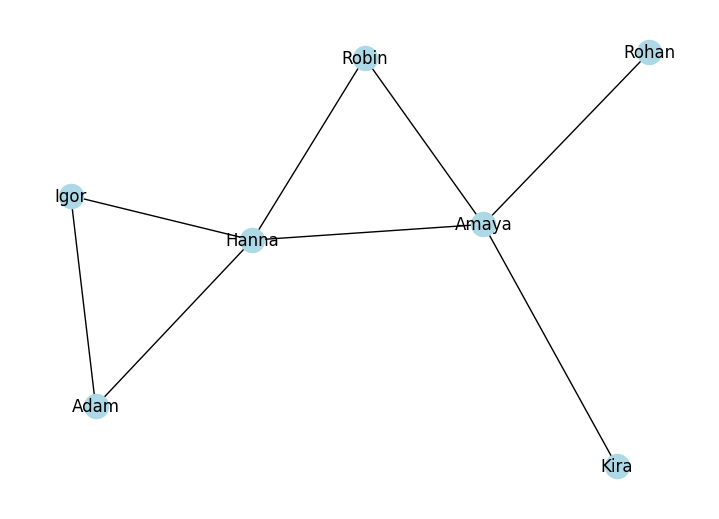

In [27]:
nx.draw(G_friends, with_labels = True, node_color='lightblue')

To test for the majority illusion, we need to compare the average of the gender shares in all ego networks to the global gender share. Hence, we first have to iterate over all ego networks (one network per friend), remove the ego node for each ego network, and calculate the share of female friends a person "sees" in their ego network. Then, we need to average the perceived gender share among all nodes.
In the second step, we need to calculate the gender shares in the friendship network from a global perspective. 

Let's extract an ego network for one person, for example Amaya. 

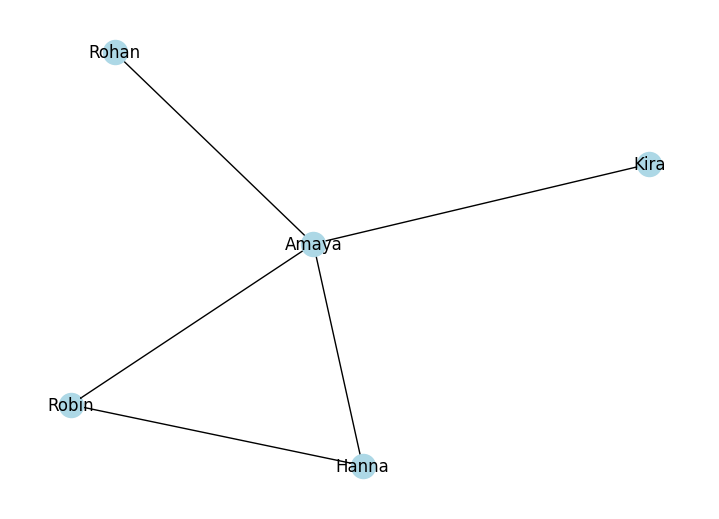

In [28]:
G_ego = nx.ego_graph(G_friends, "Amaya") # get ego network for Amaya
nx.draw(G_ego, with_labels = True, node_color='lightblue', pos = nx.kamada_kawai_layout(G_ego))

In [29]:
# extract the gender of a person's friends 
G_ego = nx.ego_graph(G_friends, "Amaya")
genders = Counter([G_ego.nodes[node2]["gender"] for node2 in G_ego.nodes if node2 != "Amaya"]) 
genders

Counter({'f': 2, 'm': 1, 'd': 1})

In [30]:
# calculation of the gender shares an person within the network sees on average. 
avg_f_gender = 0
avg_d_gender = 0
avg_m_gender = 0
for node in G_friends.nodes: # Iterate over all nodes
    G_ego = nx.ego_graph(G_friends, node) # Extract the ego network (it contains the ego!)
    # Count the number of occurences of every attribute. While doing so, ignore the ego. 
    genders = Counter([G_ego.nodes[node2]["gender"] for node2 in G_ego.nodes if node2 != node]) 
    avg_f_gender += genders["f"] / (genders["f"] + genders["m"] + genders["d"])
    avg_d_gender += genders["d"] / (genders["f"] + genders["m"] + genders["d"])
    avg_m_gender += genders["m"] / (genders["f"] + genders["m"] + genders["d"])
    
print(f'''The average node thinks that {round((100 * avg_f_gender / len(G_friends.nodes)))}% of the network is female, {round((100 * avg_d_gender / len(G_friends.nodes)))}% divers, and {round((100 * avg_m_gender / len(G_friends.nodes)))}% male.''')

The average node thinks that 68% of the network is female, 7% divers, and 25% male.


In [31]:
# calculation of the gender shares from a global perspective
global_absolut_f = 0
global_absolut_d = 0
global_absolut_m = 0
for node in G_friends.nodes: # Iterate over all nodes
    if G_friends.nodes[node]["gender"] == 'f': # Count the number of female friends
        global_absolut_f += 1
    elif G_friends.nodes[node]["gender"] == 'd': # Count the number of divers friends
        global_absolut_d += 1
    elif G_friends.nodes[node]["gender"] == 'm': # Count the number of male friends
        global_absolut_m += 1
print(f"From a global perspective, {round(global_absolut_f/len(G_friends.nodes)*100)}% of the nodes are female, {round(global_absolut_d/len(G_friends.nodes)*100)}% divers, and {round(global_absolut_m/len(G_friends.nodes)*100)}% male.")

From a global perspective, 43% of the nodes are female, 14% divers, and 43% male.


#### Exercise 1: 

What do you observe? Why do you see what you see? 

#### Exercise 2 (Extra): Reflections on the majority illusion 

(1) Which implications does this phenomenon, in your opinion, have for social cohesion? Or the "public opinion"? Political influence? ...?

(2) The majority illusion is only one peculiarity. Another stunning case, driven by homophily, that I want to bring to your attention is that even mild preferences often result in very strict homophilic patterns (along the lines of "the aggregate is more than the sum (of individual-level preferences)"). One of the most famous examples to illustrate this segregation (see work of Nobel Prize-winning game theorist Thomas Schelling, and especially his paper [Dynamic models of segregation](https://www.stat.berkeley.edu/~aldous/157/Papers/Schelling_Seg_Models.pdf) from 1971). You can play an interactive version of the paper content here: [Parable of Polygons](https://ncase.me/polygons/). Even if people are happy being in the minority, the group ends up being segregated. Comment: There is no network in this interactive post, but one could easily transfer this to a friendship network where people are allowed to rewire their connections.

#### Exercise 3: Blog posts

For this exercise, we will use some (a bit more exiting) real-world data. Precisely, the dataset from this [article](https://dl.acm.org/doi/pdf/10.1145/1134271.1134277?casa_token=4s9yFKDhE2oAAAAA:8k4b1uqozQwxn4DBIg0lDn9v0DnP07KxgYMyPYRtvmlwdf3i-8yMfpd41C74GAkFuGiRRKb9OYSuxw). 
The dataset contains front-page hyperlinks (edges) between blogs (nodes) in the context of the 2004 US election (directed network). The dataset is available [here](http://konect.cc/networks/moreno_blogs/).

(1) Load the data (edges stored in `edges_blogs.txt`) and assign the labels (stored in `node_labels_blogs.txt`) to every node. 

(2) Repeat the steps as in Exercise 1. Do you find a majority illusion here, too? 

(3) Calculate the assortativity of the leaning attribute. What do you observe?

In [32]:
df1_graph = pd.read_csv("./data/edges_blogs.txt", sep="\t", header = None).rename(columns = {0:"source", 1: "target"})
df2_nodes_attributes = pd.read_csv("./data/node_labels_blogs.txt", sep="\t", header = None).rename(columns = {0:"node", 1: "attribute"})
G1 = nx.Graph([tuple(item) for item in df1_graph.values.tolist()])

In [35]:
print(G1, nx.density(G1), nx.transitivity(G1))

Graph with 1224 nodes and 16715 edges 0.022332045382884688 0.2259585173589758


In [36]:
df1_graph.head()

,source,target
0,1,10
1,1,11
2,1,12
3,1,13
4,1,131


In [37]:
df2_nodes_attributes.head()

,node,attribute
0,1,left-leaning
1,2,left-leaning
2,3,left-leaning
3,4,left-leaning
4,5,left-leaning


In [38]:
# add attributes to node
for node in G1.nodes(): 
    G1.nodes[node]["leaning"] = list(df2_nodes_attributes[df2_nodes_attributes["node"] == node]["attribute"])[0]

In [39]:
avg_right_leaning = 0
for node in G1.nodes: # Iterate over all nodes
    G_ego = nx.ego_graph(G1, node) # Extract the ego network (this still contains the ego!)
    for node in G_ego.nodes(): 
        # add attributes to ego network
        G_ego.nodes[node]["leaning"] = list(df2_nodes_attributes[df2_nodes_attributes["node"] == node]["attribute"])[0]
    # The Counter object will tell us the popularity of each attribute value. Note how we remove the ego (node).
    leanings = Counter([G_ego.nodes[node2]["leaning"] for node2 in G_ego.nodes if node2 != node]) 
    #avg_right_leaning += leanings["right-leaning"] / (leanings["right-leaning"] + leanings["left-leaning"])
    avg_right_leaning += leanings["right-leaning"] / (len(G_ego.nodes)-1)
    
print(f"The average node thinks that {round((100 * avg_right_leaning / len(G1.nodes)), 2)}% of the network is right-leaning.")

The average node thinks that 52.54% of the network is right-leaning.


In [41]:
global_absolut = 0
for node in G1.nodes: # Iterate over all nodes
    if G1.nodes[node]["leaning"] == 'right-leaning': 
        global_absolut += 1
        
print(f"From a global perspective {round(global_absolut/len(G1.nodes)*100, 2)}% of the nodes are right-leaning.")

From a global perspective 51.96% of the nodes are right-leaning.


In [42]:
# assortativity 
coef = nx.attribute_assortativity_coefficient(G1, "leaning")
print(f"The attribute assortativity coefficient for leaning is {round(coef, 2)}.")

The attribute assortativity coefficient for leaning is 0.81.


Even though both political blog communities are divided, the majority illusion does not seem to be present in this case. Both the averaged ego perspectives and the global network perspective lead to similar results with respect to the share of nodes that are right-leaning. 

However, the high attribute assortative coefficient indicates that the blogs tend to reference those like them with regard to political orientation.

### The friendship paradox

#### Exercise 4: 

It's time for the next peculiarity of network effects: The friendship paradox. 

For this exercise, we will use the data from the following [paper](https://dl.acm.org/doi/pdf/10.1145/1592665.1592675): 
Viswanath, B., Mislove, A., Cha, M., & Gummadi, K. P. (2009). On the evolution of user interaction in Facebook. Proceedings of the 2nd ACM Workshop on Online Social Networks, 37–42. 

You can find it in the data folder under the name `data-facebook.txt`. 

(1) Read in the data, and construct your graph. 

(2) We are interested in the assortativity by number of friends (i.e. the degree assortativity). Generate a plot that shows the average number of the friends of a person's friends against the number of this person's friends. Add the identity line (line that goes through (0,0) and (1,1)). 

(3) Persons above the identity line have fewer friends than their average neighbour, while nodes below the identity line have more. The friendship paradox states that most nodes have fewer friends than their friends on average. Can you check whether the friendship paradox is also at play in the Facebook network? (Hint: One needs to count the number of nodes above and below the identity line and compare the size of both groups.)

(4) Calculate the degree assortativity.

In [43]:
# read in the data
df2_graph = pd.read_csv("./data/data_facebook.txt", sep=" ", header = None).rename(columns = {0:"source", 1: "target"})
G_facebook = nx.Graph([tuple(item) for item in df2_graph.values.tolist()])

In [44]:
df2_graph.head()

,source,target
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [55]:
# Get the degrees of the nodes
degrees = dict(G_facebook.degree)

In [46]:
# prepare the data for the plot
degree_assort = [(degrees[n], degrees[n2]) for n in G_facebook.nodes for n2 in G_facebook.neighbors(n)]
degree_assort = pd.DataFrame(data = degree_assort, columns = ("k", "neigh_k"))
degree_assort = degree_assort.groupby(by = "k").mean().reset_index()

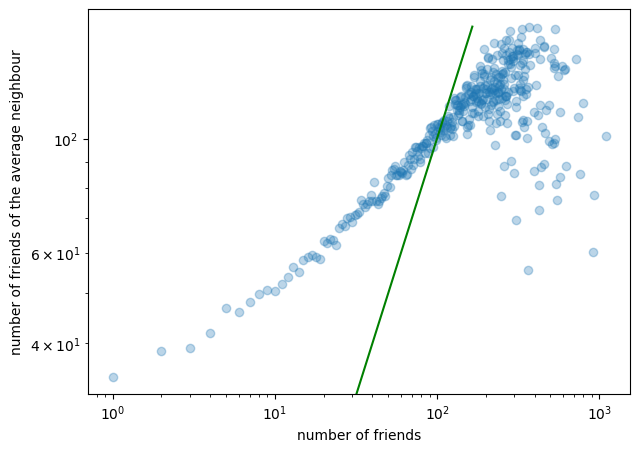

In [47]:
# plot the data
ax = plt.gca()
plt.scatter(degree_assort["k"], degree_assort["neigh_k"], alpha = 0.3)
ax.set_yscale("log")
ax.set_xscale("log")

plt.plot([0, max(degree_assort["neigh_k"])],[0, max(degree_assort["neigh_k"])], color = "green")

plt.xlabel("number of friends")
plt.ylabel("number of friends of the average neighbour")

plt.show()

In [56]:
# count the number of node above and below the identity line

i_have_more_friends = 0
my_friends_have_more_friends = 0

for n1 in G_facebook.nodes:
    if degrees[n1] < np.mean([degrees[n2] for n2 in G_facebook.neighbors(n1)]):
        my_friends_have_more_friends += 1
    else: 
        i_have_more_friends += 1
        
if i_have_more_friends < my_friends_have_more_friends: 
    print("We found a friendship paradox.")
else: 
    print("We did not observe a friendship paradox.")

We found a friendship paradox.


In [57]:
# calculation of the degree assortativity
# Two vectors containing the nodes' degrees
degree_assortativity = nx.degree_assortativity_coefficient(G_facebook)
print(f"Degree assortativity coefficient: {round(degree_assortativity, 2)}.") 

Degree assortativity coefficient: 0.18.


The friendship paradox is the observation that the degrees of the neighbours of a node in a network are, on average, greater than the degree of the node itself. In other words, your friends have more friends than you do. 
We see evidence for this in the data: if there was no degree assortativity in the network, points in the plot would scatter around the identity line. Instead, most points in the low and intermediate range (people having one to around 80 friends) tend to be connected to individuals who have more friends. The most popular individuals in the network (100 friends and more) tend to be connected to individuals who have fewer friends, in other words, they have many 'followers' who are not so well connected.